In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
experiencia = pd.Series([1.1,1.2,1.5,2,2.3,2.5,3,3.2,3.5,3.8,3.9,4.1,4.8,5,6,6.3,6.8,6.9,7,7.1,7.2,7.5,7.7,7.9,8,8.6,9,9.3,9.5])
experiencia
salario = pd.Series([39365,46000,37800,40000,42000,45000,49500,39000,43000,44000,42000,50000,49000,52000,51000,56000,60000,55000,59000,62000,63000,61000,68000,70000,72000,71000,79000,69000,78000])
salario
df = pd.DataFrame({'Experiecia': experiencia, 'Salario': salario })
df

,Experiecia,Salario
0,1.1,39365
1,1.2,46000
2,1.5,37800
3,2.0,40000
4,2.3,42000
5,2.5,45000
6,3.0,49500
7,3.2,39000
8,3.5,43000
9,3.8,44000


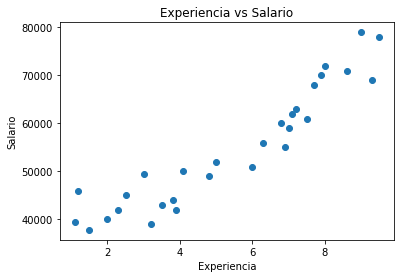

In [2]:
plt.scatter(experiencia, salario)
plt.title('Experiencia vs Salario')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [3]:
salario.isnull().sum()

0

In [4]:
experiencia.isnull().sum()

0

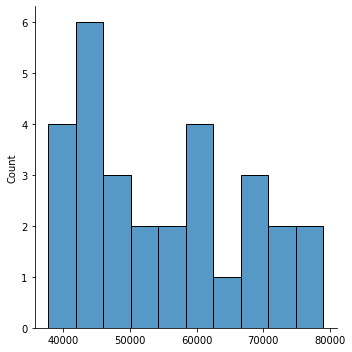

In [5]:
sns.displot(salario, bins=10)
plt.show()

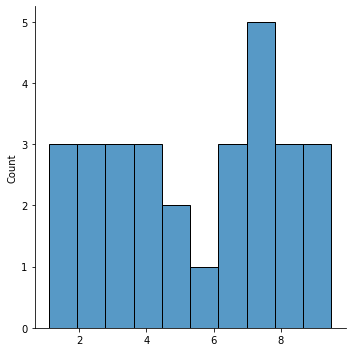

In [6]:
sns.displot(experiencia, bins=10)
plt.show()

<AxesSubplot:>

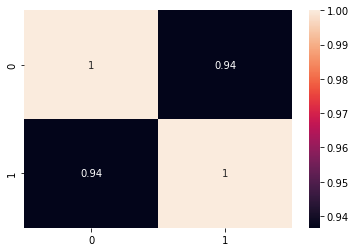

In [7]:
correlation_salario = np.corrcoef(salario, experiencia)
sns.heatmap(data= correlation_salario, annot=True)
# los balores cercanos a 1 o -1 significa que la correlacion es buena

In [8]:
print('Maximo valor {}'.format(salario.max()))
print('Minimo valor {}'.format(salario.min()))
print('Mean valor {}'.format(salario.mean()))
print('Median valor {}'.format(salario.median()))
print('Standar valor {}'.format(salario.std()))

Maximo valor 79000
Minimo valor 37800
Mean valor 54919.48275862069
Median valor 52000.0
Standar valor 12467.608341563377


In [9]:
x_expericia = experiencia
y_salario = salario

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_expericia, y_salario, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23,)
(6,)
(23,)
(6,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# x_train = x_train.values.reshape(-1,1)
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import r2_score
#x_test = x_test.values.reshape(-1,1)
y_test_predict = lin_model.predict(x_test)
r2 = r2_score(y_test, y_test_predict)
print('The model performace for testing set')
print(f'R2 score is {r2} ')

The model performace for testing set
R2 score is 0.8966371164015831 


In [ ]:
# y = mx + b

In [25]:
print('Coeficiente \n', lin_model.coef_ )
print('Independent term: \n', lin_model.intercept_ )

Coeficiente 
 [4400.78542534]
Independent term: 
 31654.353070407065


In [28]:
#experiencia = experiencia.values.reshape(-1,1)
# Lo anterior es por que lo pide en 2 dimensiones
predicted_data_salario = lin_model.predict(experiencia)
predicted_data_salario[0:5]

array([36495.21703828, 36935.29558081, 38255.53120841, 40455.92392108,
       41776.15954868])

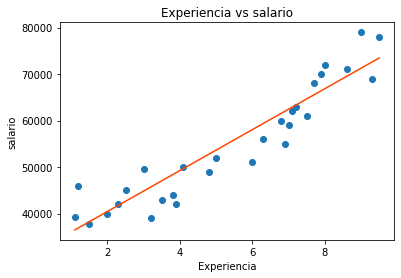

In [31]:
plt.scatter(experiencia, salario)
plt.plot(experiencia, predicted_data_salario, color='orangered')
plt.title('Experiencia vs salario')
plt.xlabel('Experiencia')
plt.ylabel('salario')
plt.show()

In [34]:
df_predictor_salario = pd.DataFrame({'Salario real': salario, 'Prediccion': predicted_data_salario})
df_predictor_salario

,Salario real,Prediccion
0,39365,36495.217038
1,46000,36935.295581
2,37800,38255.531208
3,40000,40455.923921
4,42000,41776.159549
5,45000,42656.316634
6,49500,44856.709346
7,39000,45736.866431
8,43000,47057.102059
9,44000,48377.337687


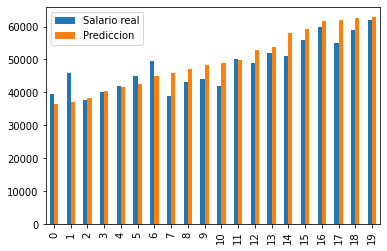

In [36]:
df_predictor_salario.head(20).plot(kind= 'bar')
plt.show()

In [ ]:
# --- EJERCICIO CON DATOS DE CASAS DE BOSTON ----

In [43]:
from sklearn.datasets import load_boston
ds_boston = load_boston()
ds_boston

C:\Users\Tackel\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [44]:
ds_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [46]:
df_boston = pd.DataFrame(ds_boston.data, columns=ds_boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
df_boston.shape

(506, 13)

In [48]:
# saber datos sobre los nombres de las columnas
ds_boston.DESCR


".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [49]:
df_boston['MEDV'] = ds_boston.target
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
